In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

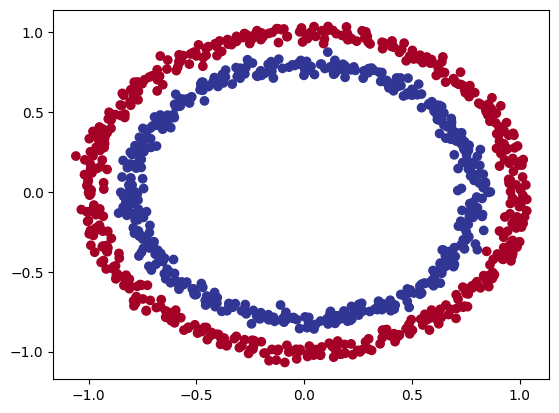

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
print(X.shape,y.shape)

(1000, 2) (1000,)


In [ ]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(Dense(1))
model_1.compile(loss = BinaryCrossentropy(),optimizer = SGD(),metrics = ['accuracy'] )

model_1.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.4805 - accuracy: 0.4670
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.4960
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4870
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4900
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4930
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4610
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5170
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4740
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4770


In [ ]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(Dense(100))
model_2.add(Dense(1))
model_2.compile(loss = BinaryCrossentropy(),optimizer = SGD(),metrics = ['accuracy'] )

model_2.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.8329 - accuracy: 0.4540
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4870
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4640
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4860
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4840
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5150
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4750
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5050
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4920
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4700


In [ ]:
tf.random.set_seed(42)

model_3 = Sequential()
model_3.add(Dense(100,input_shape = (None,1)))
model_3.add(Dense(10))
model_3.add(Dense(1))
model_3.compile(loss = BinaryCrossentropy(),optimizer = 'adam',metrics = ['accuracy'] )

model_3.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 2.1130 - accuracy: 0.4999
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.4970
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4987
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4997
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4904
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4934
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4999


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step


(-1.1677683182718437, 1.1360036756154805)

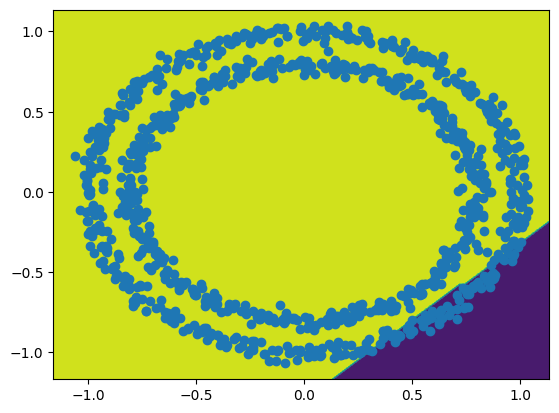

In [ ]:
# x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
# y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100)) #create 100*100
# x_in = np.c_[xx.ravel(),yy.ravel()] #4x2 
# y_pred = model_2.predict(x_in)

# y_pred = np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
# plt.contourf(xx,yy,y_pred)
# plt.scatter(X[:,0],X[:,1])
# plt.xlim(xx.min(),xx.max())
# plt.ylim(yy.min(),yy.max())

In [ ]:
tf.random.set_seed(42)

model_4 = Sequential()
model_4.add(Dense(100,input_shape = (None,1),activation='relu'))
model_4.add(Dense(10,'relu'))
model_4.add(Dense(1))
model_4.compile(loss = BinaryCrossentropy(),optimizer = 'adam',metrics = ['accuracy'] )

model_4.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 2ms/step - loss: 1.9045 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.4926
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.4958
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.4976
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.4947
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4972
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4958
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4919
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4929
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5049


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


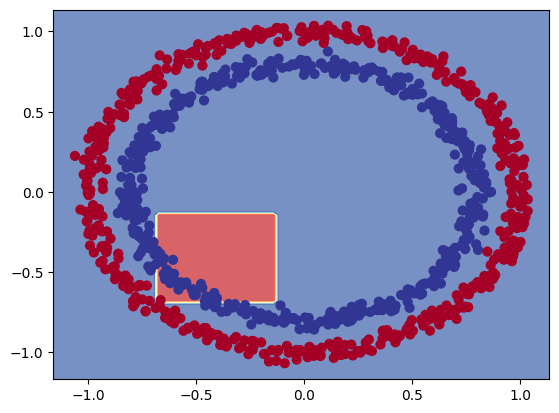

In [ ]:
plot_decision_boundary(model_4, X, y)

In [ ]:
tf.random.set_seed(42)

model_5 = Sequential()
model_5.add(Dense(100,input_shape = (None,1),activation='relu'))
model_5.add(Dense(100,'relu'))
model_5.add(Dense(50,'relu'))
model_5.add(Dense(1))
model_5.compile(loss = BinaryCrossentropy(),optimizer = 'adam',metrics = ['accuracy'] )

model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.9654 - accuracy: 0.4893
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7352 - accuracy: 0.4969
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.4928
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.4865
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4981
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4823
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4931
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4991
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5005
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


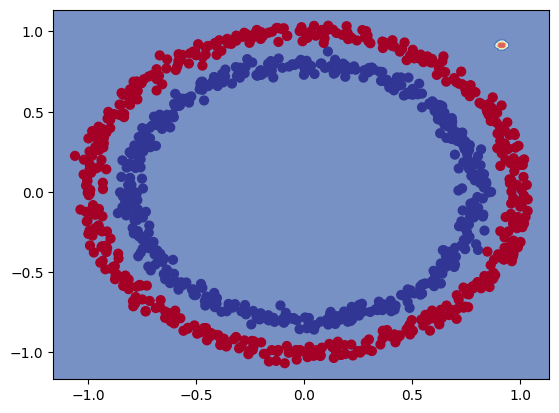

In [ ]:
plot_decision_boundary(model_5, X, y)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.5190
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.8650
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.9710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9930
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9990
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9990
Epoch 11/

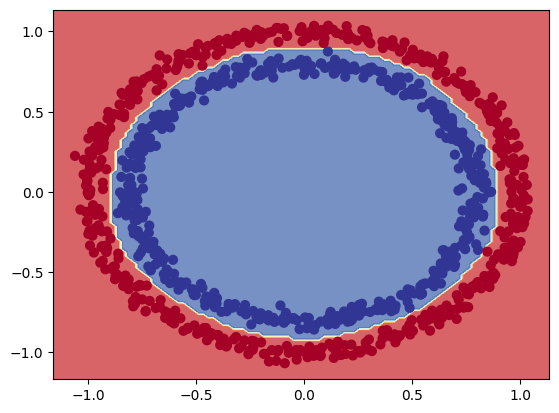

In [ ]:
tf.random.set_seed(42)

model_6 = Sequential()
model_6.add(Dense(100,activation='relu'))
model_6.add(Dense(100,'relu'))
model_6.add(Dense(50,'relu'))
model_6.add(Dense(1,'sigmoid'))
model_6.compile(loss = BinaryCrossentropy(),optimizer = 'adam',metrics = ['accuracy'] )

model_6.fit(X,y,epochs=100)
plot_decision_boundary(model_6, X, y)

In [ ]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape #

((800, 2), (200, 2))

Epoch 1/25
25/25 [==============================] - 3s 4ms/step - loss: 0.6868 - accuracy: 0.5312
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.6338
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6275
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6356 - accuracy: 0.7212
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6047 - accuracy: 0.7437
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5615 - accuracy: 0.8575
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.9125
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8900
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4025 - accuracy: 0.9438
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.9688
Epoch 11/25
25/25 [

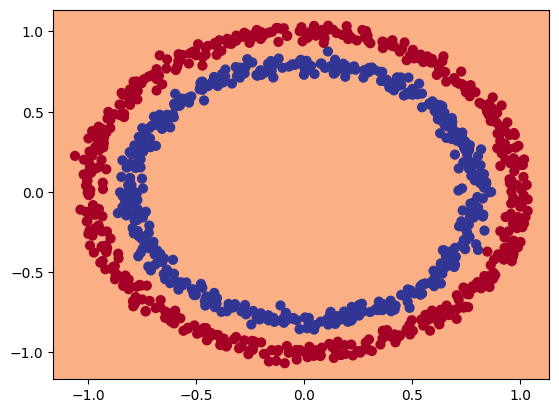

In [ ]:
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


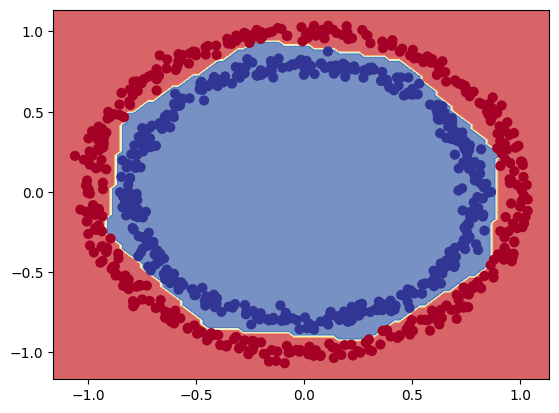

In [ ]:
plot_decision_boundary(model_8, X_train, y_train)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


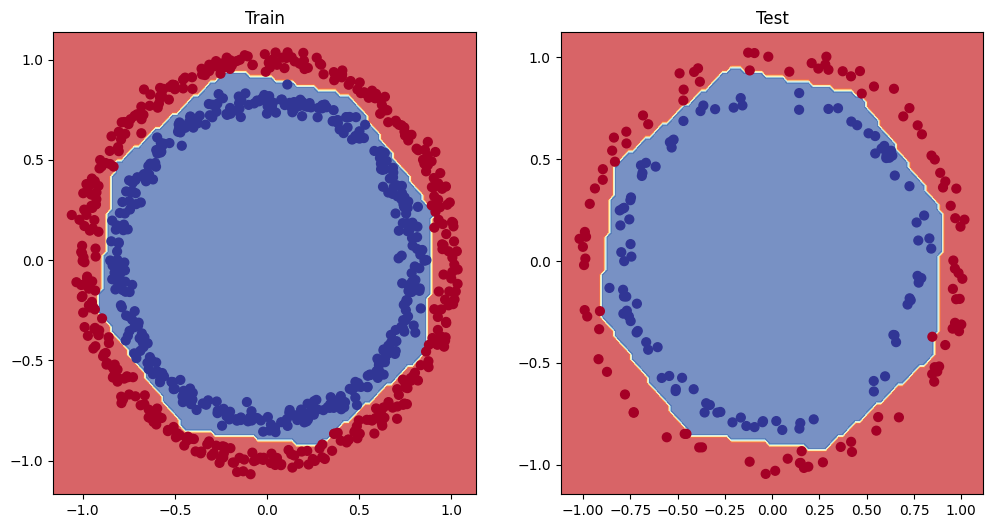

In [ ]:


# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

#Callback for LR


In [ ]:
tf.random.set_seed(42)

# Create the model (same as model_7)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

#callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10**(epoch/20))#for every epoch lr changes 


# Fit the model
history = model_9.fit(X_train, y_train, epochs=100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

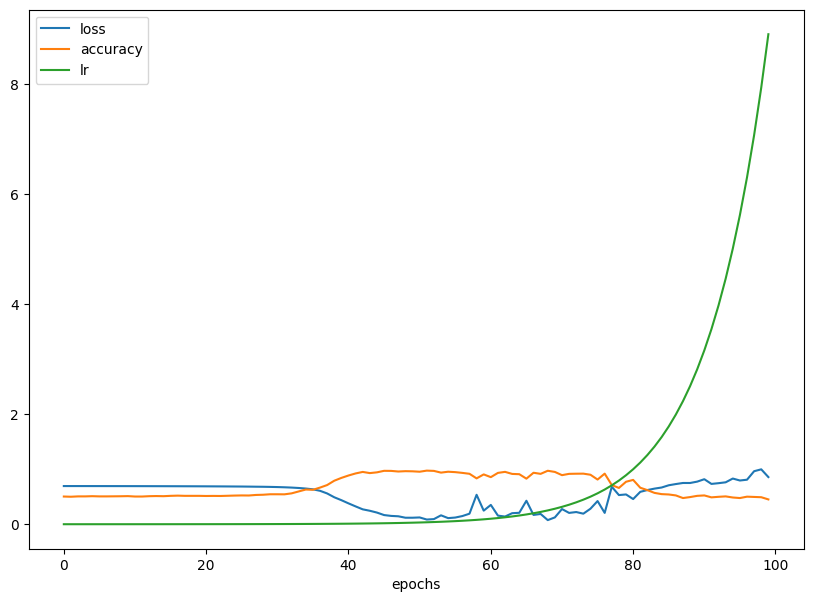

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

# Multiclass Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

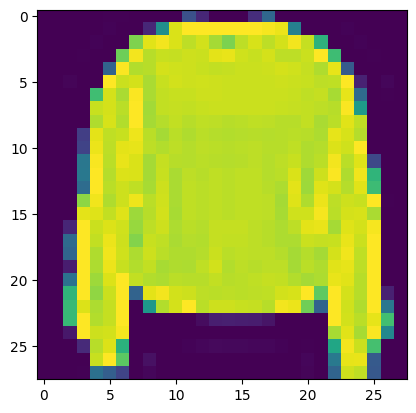

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

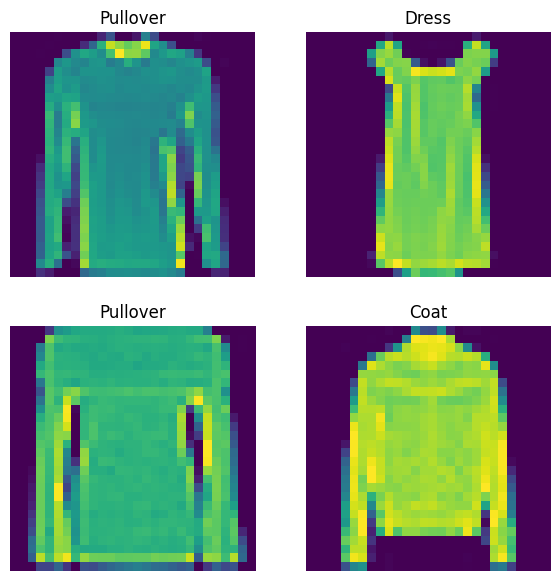

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_11 = Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model_11.add(Dense(4,'relu'))
model_11.add(Dense(4,'relu'))
model_11.add(Dense(10,'softmax'))

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model_11.fit(train_data,train_labels,epochs=10,validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3873 - accuracy: 0.0989 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3039 - accuracy: 0.1036 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#(784 * 4) + 4 = 3140
#(4 * 10) + 10 = 50

In [ ]:


# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))
     


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.3123 - accuracy: 0.5018 - val_loss: 0.9062 - val_accuracy: 0.6749
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7692 - accuracy: 0.7309 - val_loss: 0.7435 - val_accuracy: 0.7457
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6878 - accuracy: 0.7536 - val_loss: 0.7012 - val_accuracy: 0.7570
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6611 - accuracy: 0.7625 - val_loss: 0.6851 - val_accuracy: 0.7638
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6462 - accuracy: 0.7668 - val_loss: 0.6741 - val_accuracy: 0.7644
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6369 - accuracy: 0.7691 - val_loss: 0.6911 - val_accuracy: 0.7588
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6310 - accuracy: 0.7716 - val_loss: 0.6984 - val_accuracy:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/10))
# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model (to the normalized data)
norm_history = model_13.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels),
                            callbacks = [lr_scheduler])

     


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.2707 - accuracy: 0.5483 - val_loss: 0.9048 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8040 - accuracy: 0.7382 - val_loss: 0.7457 - val_accuracy: 0.7503 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7005 - accuracy: 0.7548 - val_loss: 0.7284 - val_accuracy: 0.7382 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6619 - accuracy: 0.7637 - val_loss: 0.6601 - val_accuracy: 0.7628 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6409 - accuracy: 0.7685 - val_loss: 0.6607 - val_accuracy: 0.7633 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6295 - accuracy: 0.7719 - val_loss: 0.6533 - val_accuracy: 0.7727 - lr: 0.0032
Epoch 7/10
1875/1875 [==============================] - 4s

<Axes: >

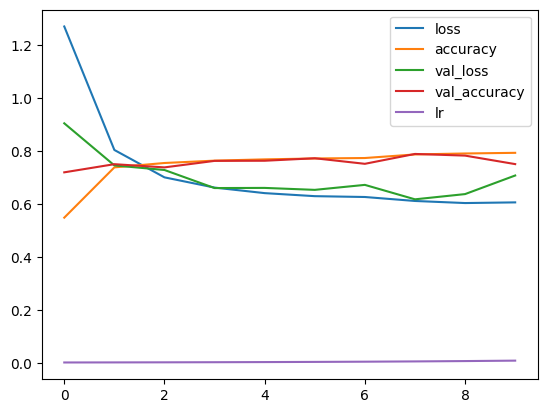

In [ ]:
pd.DataFrame(norm_history.history).pblot()

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
     

In [ ]:


# Make predictions with the most recent model
y_probs = model_13.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 4ms/step


array([[7.54968710e-08, 3.67490829e-11, 9.16766177e-11, 2.33227240e-07,
        1.41407142e-07, 7.94815183e-01, 1.61982200e-07, 2.66873520e-02,
        6.81443722e-04, 1.77815422e-01],
       [4.55285452e-04, 1.39066969e-07, 9.49654639e-01, 2.06722062e-09,
        3.06498483e-02, 7.00610720e-24, 1.92399621e-02, 0.00000000e+00,
        1.04100437e-07, 3.08134400e-34],
       [1.38497271e-04, 9.82542515e-01, 1.33289688e-03, 8.29041563e-03,
        9.94147034e-04, 4.75045387e-03, 9.98135190e-04, 8.88745824e-04,
        5.14486819e-05, 1.25672868e-05],
       [1.38497271e-04, 9.82542515e-01, 1.33289688e-03, 8.29041563e-03,
        9.94147034e-04, 4.75045387e-03, 9.98135190e-04, 8.88745824e-04,
        5.14486819e-05, 1.25672868e-05],
       [1.12693720e-01, 2.04607798e-03, 5.44652760e-01, 1.01231169e-02,
        1.14005454e-01, 5.51923562e-10, 2.16027826e-01, 1.50852049e-18,
        4.50905121e-04, 1.14969190e-15]], dtype=float32)

In [ ]:
y_pred = y_probs.argmax(axis=1)
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_pred)

array([[752,   2,  59, 141,  14,   1,  21,   0,  10,   0],
       [  1, 946,   4,  32,  16,   0,   0,   0,   1,   0],
       [ 21,   1, 685,  17, 271,   0,   5,   0,   0,   0],
       [ 25,  45,  52, 831,  41,   1,   2,   0,   3,   0],
       [  0,   1, 147,  37, 810,   2,   3,   0,   0,   0],
       [  0,   0,   0,   2,   4, 937,   0,  37,   7,  13],
       [209,   0, 239,  86, 375,   1,  82,   0,   8,   0],
       [  0,   0,   0,   0,   0,  90,   0, 876,   0,  34],
       [  8,   0,  15,  21, 118,  20,  33,   4, 780,   1],
       [  0,   0,   0,   0,   0, 139,   0,  48,   6, 807]])

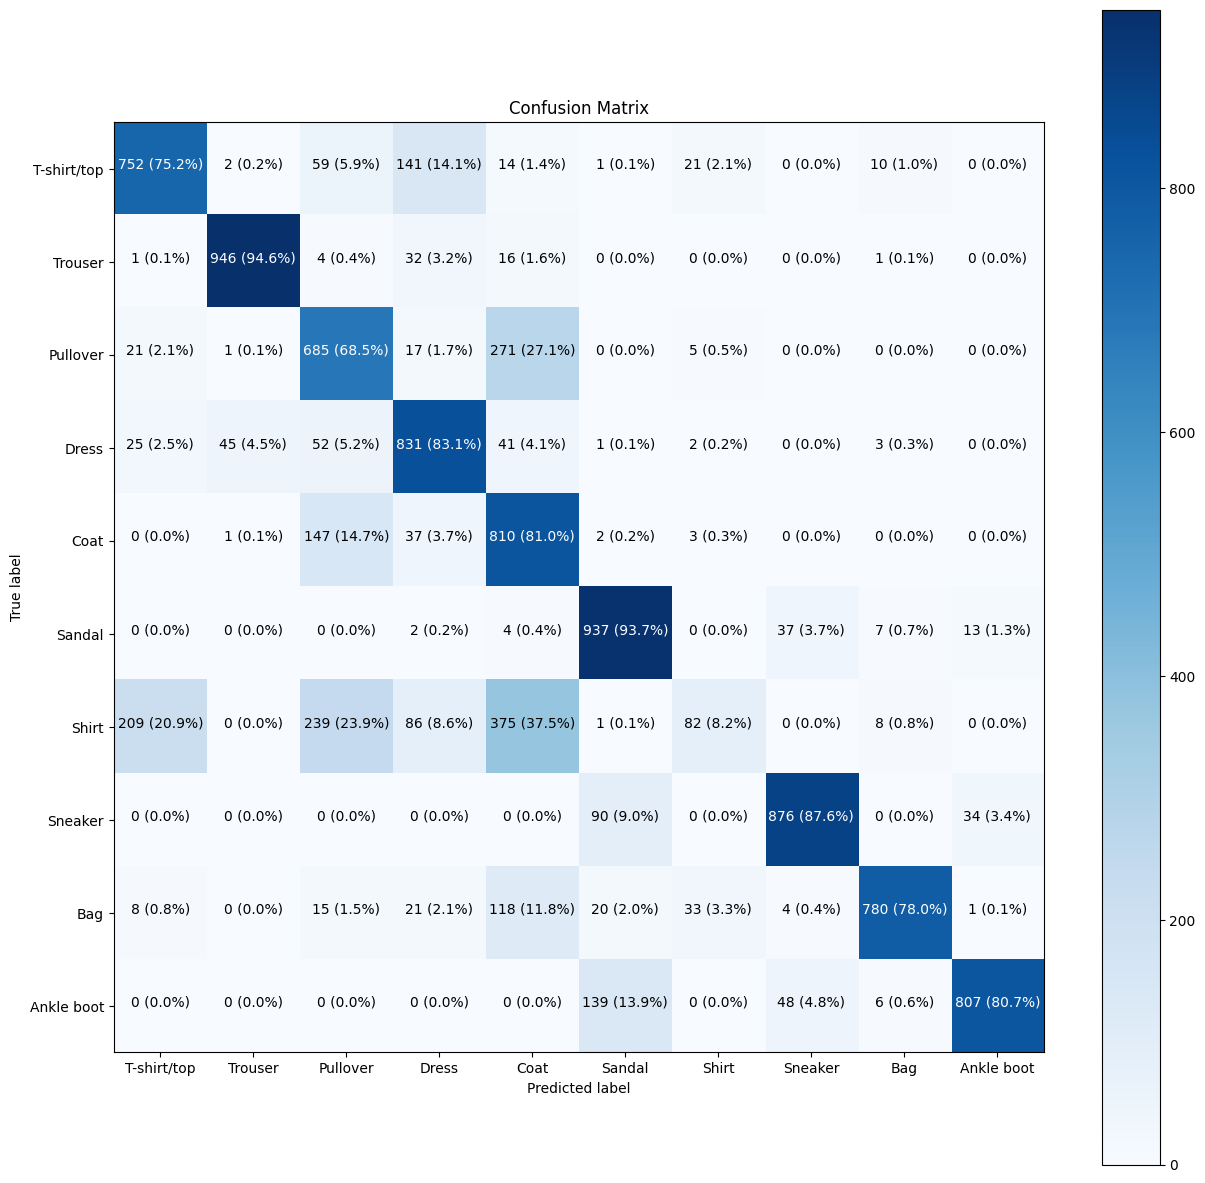

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
model_11.layers[1].get_weights()

[array([[-0.01998039, -0.08192405,  0.01866312,  0.00610264],
        [-0.00726477,  0.05970222,  0.06727523,  0.01277389],
        [ 0.03458267,  0.08190279, -0.07269157,  0.01018966],
        ...,
        [-0.03621826, -0.09988158,  0.02128331, -0.04898134],
        [ 0.00049935,  0.04858741, -0.03944043, -0.04372035],
        [ 0.05980419, -0.04129232,  0.00530066,  0.02651574]],
       dtype=float32),
 array([-0.01523554, -0.02858054, -0.05292596,  0.03853582], dtype=float32)]